<a href="https://colab.research.google.com/github/iaintheardofu/STA_6543/blob/main/Copy_of_STA_6543_Assignment2_Michael_Pendleton_ijd706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 STA_6453 Michael Pendleton_ijd706

#2. Carefully explain the differences between the KNN classifier and KNN regression methods.

#Answer:

#The KNN (K-Nearest Neighbors) classifier and KNN regression methods are both machine learning algorithms that are based on the KNN algorithm. ​ However, there are some key differences between the two methods:

#Objective: KNN Classifier: The objective of the KNN classifier is to classify or categorize data points into different classes or categories. ​ It predicts the class label of a new data point based on the majority class labels of its K nearest neighbors. KNN Regression: The objective of the KNN regression is to predict a continuous or numerical value for a new data point. ​ It predicts the value of a new data point based on the average or weighted average of the values of its K nearest neighbors.

#Output: KNN Classifier: The output of the KNN classifier is a class label or category for a new data point. KNN Regression: The output of the KNN regression is a continuous or numerical value for a new data point. ​

#Distance Metric: KNN Classifier: In the KNN classifier, the distance metric is typically calculated using measures such as Euclidean distance or Manhattan distance. These distance metrics are used to determine the similarity between data points and find the K nearest neighbors. KNN Regression: In the KNN regression, the distance metric is also used to find the K nearest neighbors. ​ However, instead of using the majority class labels of the neighbors, the average or weighted average of the target values of the neighbors is used to predict the value for the new data point.

#Training Data: KNN Classifier: The training data for the KNN classifier consists of labeled data points, where each data point is associated with a class label or category. KNN Regression: The training data for the KNN regression consists of data points with their corresponding target values or continuous values. ​

#Evaluation: KNN Classifier: The performance of the KNN classifier is typically evaluated using metrics such as accuracy, precision, recall, and F1 score, which measure the classification performance. KNN Regression: The performance of the KNN regression is typically evaluated using metrics such as mean squared error (MSE) or root mean squared error (RMSE), which measure the difference between the predicted values and the actual values. ​

#In summary, the KNN classifier is used for classification tasks, where the goal is to assign class labels to new data points, while the KNN regression is used for regression tasks, where the goal is to predict continuous or numerical values for new data points. ​ The main difference lies in the objective, output, and evaluation of the two methods.

9. This question involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [2]:
auto_df = pd.read_csv('/content/Auto.csv')

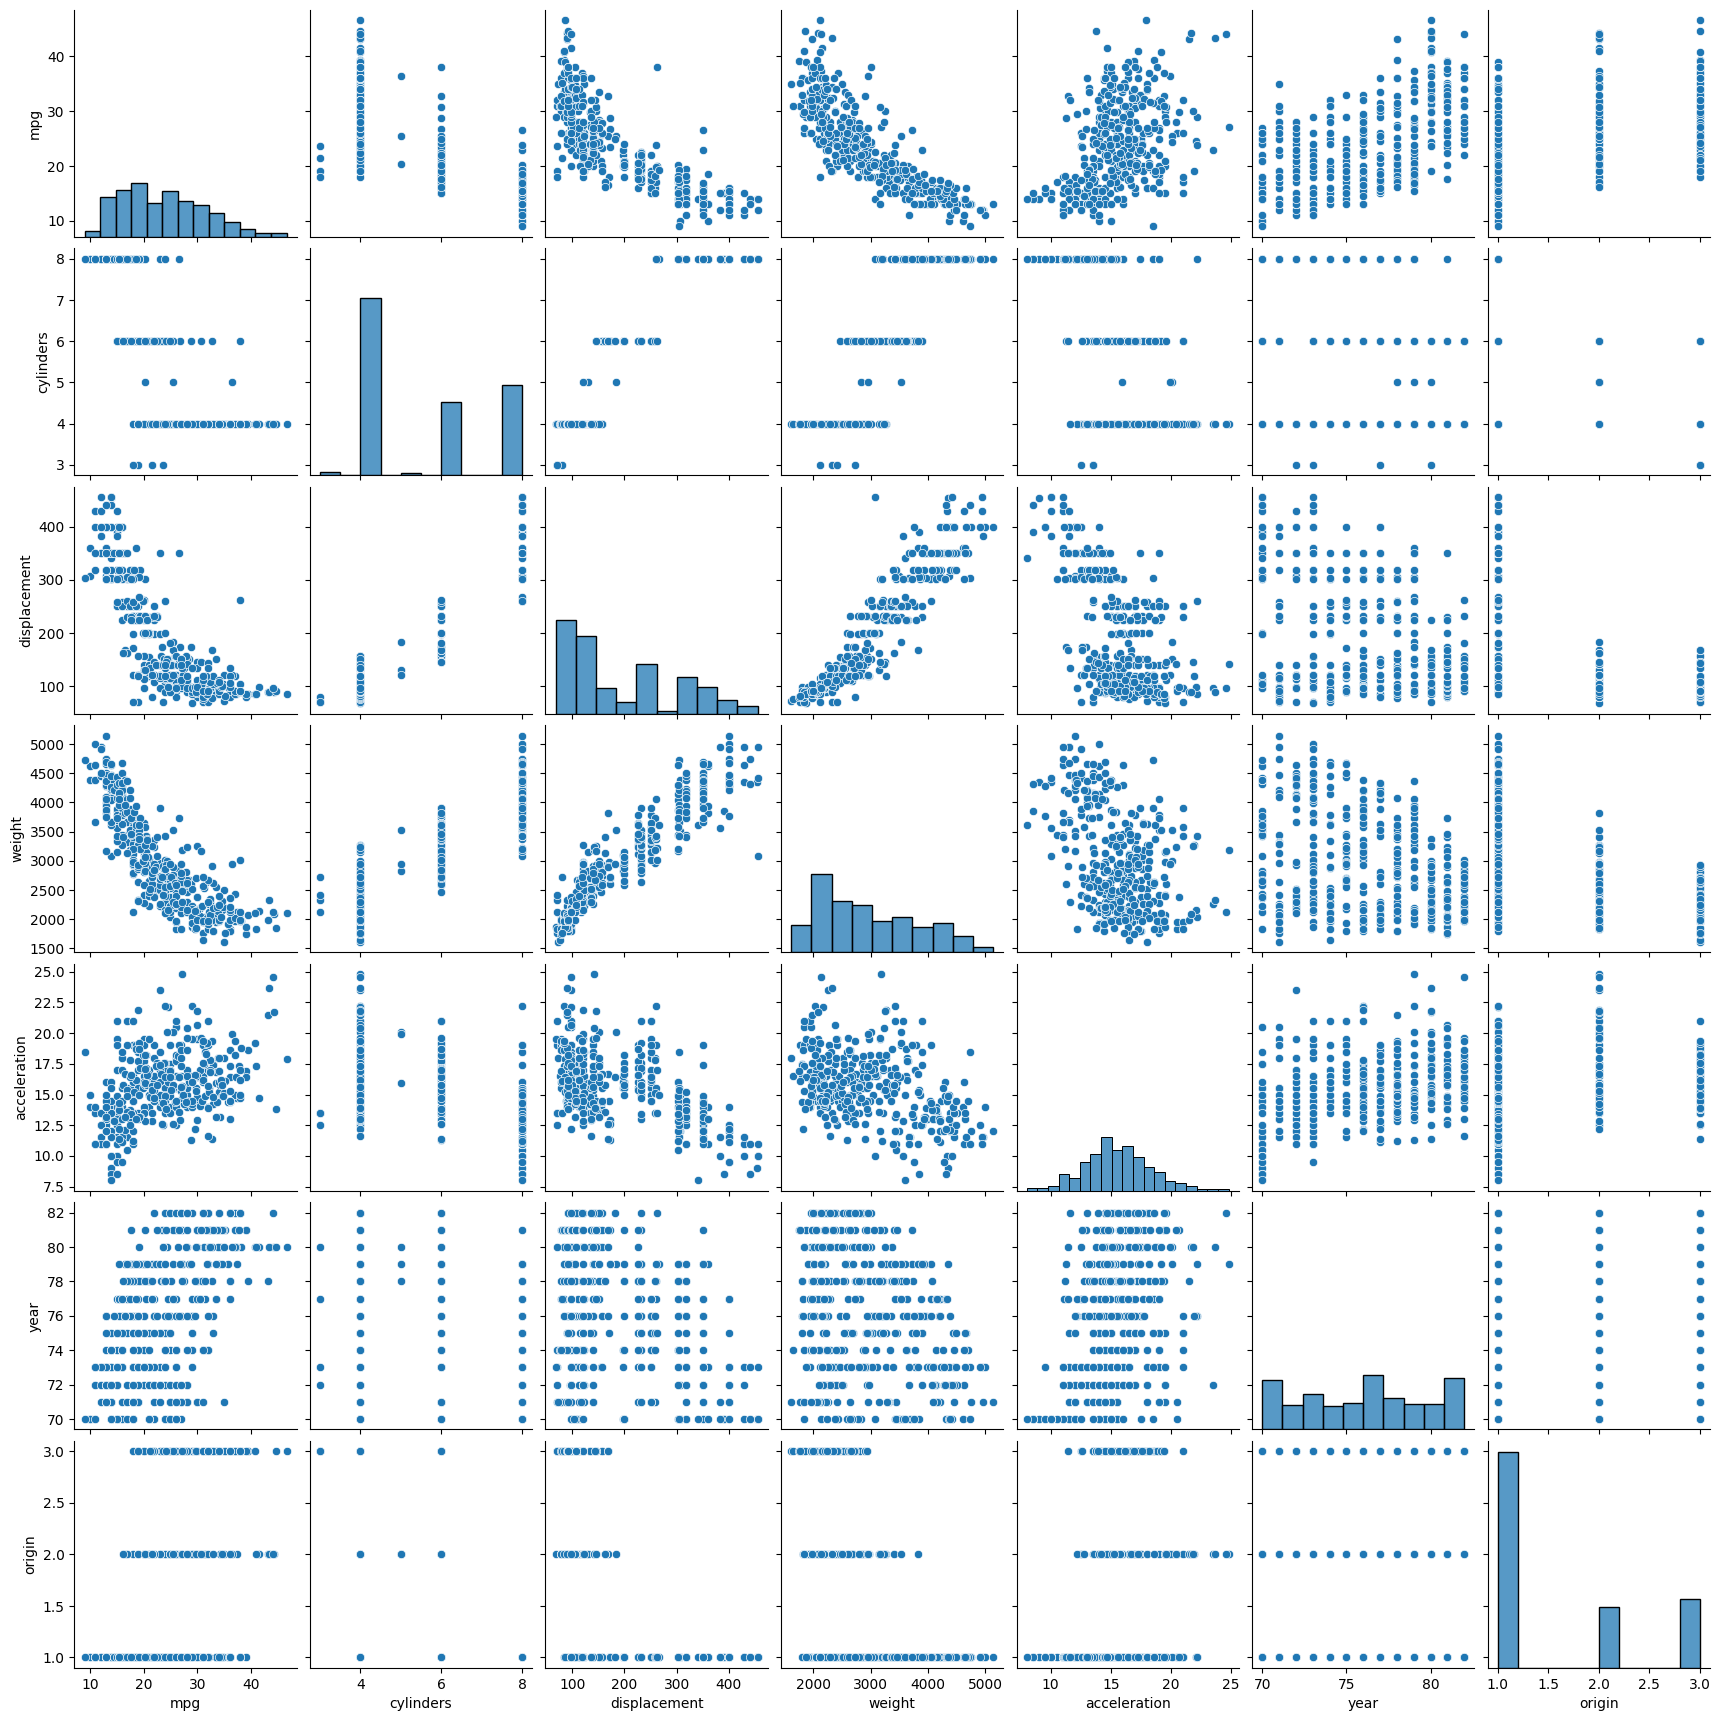

In [3]:
sns.pairplot(auto_df)

In [4]:
import matplotlib.pyplot as plt
plt.show()

#9(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method. .corr()

In [5]:
# Compute the matrix of correlations between the variables
correlation_matrix = auto_df.corr()

<ipython-input-5-bbd2f595afd0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = auto_df.corr()


In [6]:
# Display the correlation matrix
print(correlation_matrix)

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.776260     -0.804443 -0.831739      0.422297   
cylinders    -0.776260   1.000000      0.950920  0.897017     -0.504061   
displacement -0.804443   0.950920      1.000000  0.933104     -0.544162   
weight       -0.831739   0.897017      0.933104  1.000000     -0.419502   
acceleration  0.422297  -0.504061     -0.544162 -0.419502      1.000000   
year          0.581469  -0.346717     -0.369804 -0.307900      0.282901   
origin        0.563698  -0.564972     -0.610664 -0.581265      0.210084   

                  year    origin  
mpg           0.581469  0.563698  
cylinders    -0.346717 -0.564972  
displacement -0.369804 -0.610664  
weight       -0.307900 -0.581265  
acceleration  0.282901  0.210084  
year          1.000000  0.184314  
origin        0.184314  1.000000  


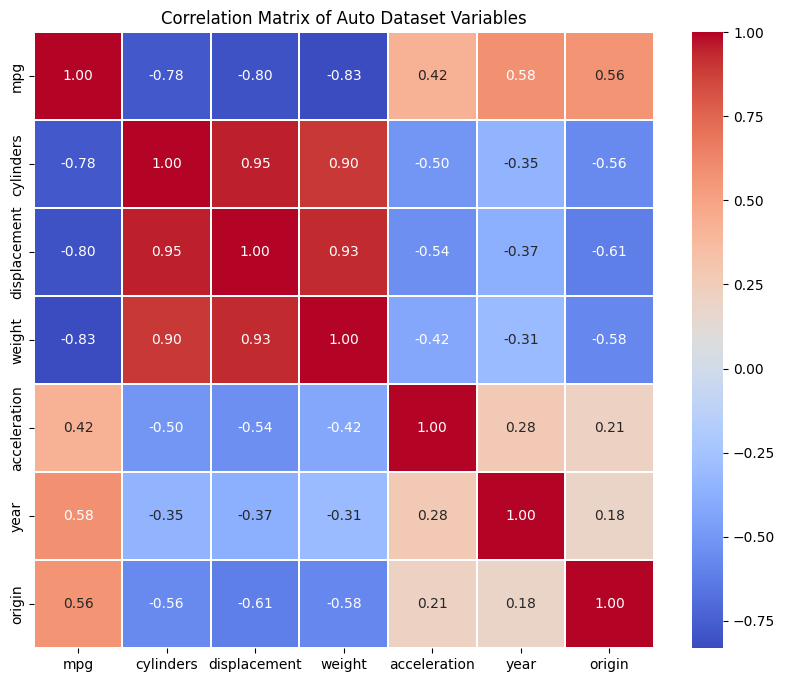

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Auto Dataset Variables')
plt.show()

#9(c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:



In [8]:
# Convert 'horsepower' to numeric, coerce errors to NaN, then drop missing values if not done already
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
auto_df.dropna(inplace=True)

In [9]:
# Prepare the data for regression
X = auto_df.drop(['mpg', 'name'], axis=1)  # Use all variables except 'mpg' and 'name' as predictors
y = auto_df['mpg']  # Response variable
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          2.04e-139
Time:                        18:01:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

#i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.



In [10]:
# Prepare the formula string for all predictors except 'name'
predictor_cols = auto_df.columns.drop(['mpg', 'name']).tolist()
formula = 'mpg ~ ' + ' + '.join(predictor_cols)

# Fit the model using the formula API
model_formula = ols(formula, data=auto_df).fit()

# Perform ANOVA on the fitted model using the formula API
anova_results = anova_lm(model_formula)
print(anova_results)


                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


i. Relationship Between Predictors and Response: The F-statistic and its corresponding p-value in the ANOVA results will tell you if there's a significant relationship. A small p-value (typically < 0.05) indicates that at least one predictor is significantly related to the response.

#ii. Which predictors appear to have a statistically significant relationship to the response?



ii. Statistically Significant Predictors: In the regression summary, predictors with p-values < 0.05 are considered statistically significant.

#iii. What does the coefficient for the year variable suggest?



iii. Coefficient for the Year Variable: A positive coefficient for year suggests that mpg increases with newer models, indicating an improvement in fuel efficiency over time.

#9(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?



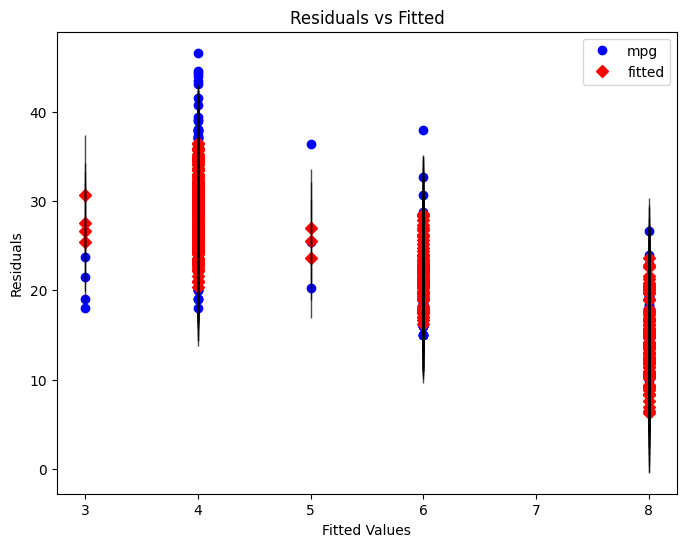

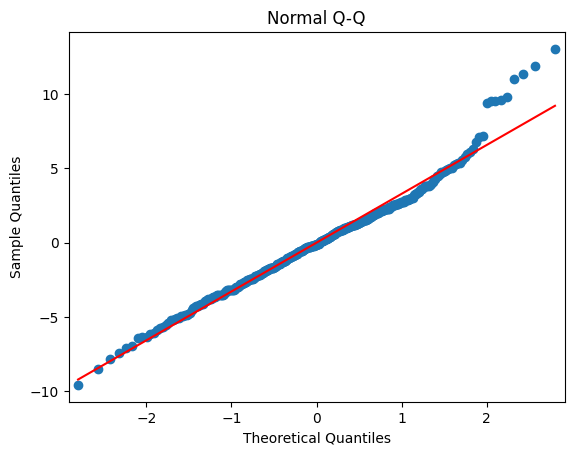

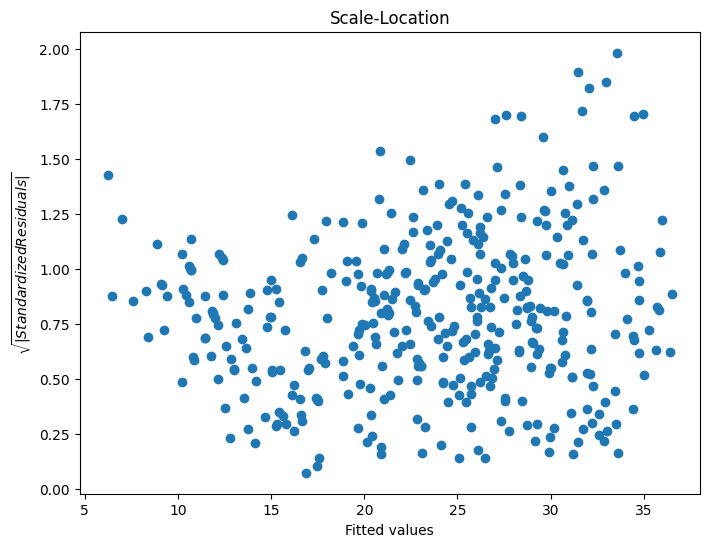

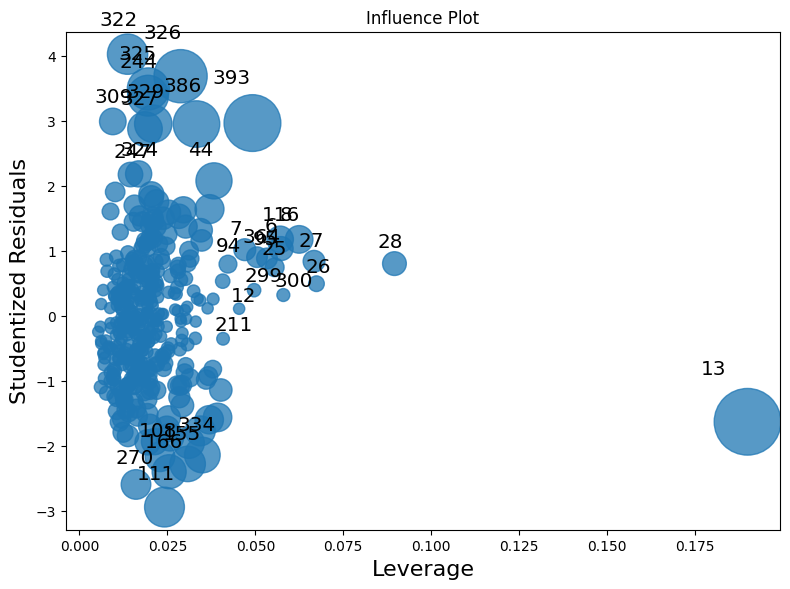

In [11]:
# Diagnostic Plots

# Residuals vs Fitted Values
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_fit(model_formula, 1, ax=ax)  # Change '1' to index of predictor of interest
ax.set_title('Residuals vs Fitted')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')

# Q-Q plot for normality of residuals
fig = sm.qqplot(model_formula.resid, line='s')
plt.title('Normal Q-Q')

# Scale-Location plot (Residuals vs Fitted Values)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(model_formula.fittedvalues, np.sqrt(np.abs(model_formula.resid_pearson)))
ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Leverage plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model_formula, ax=ax, criterion="cooks")
ax.set_title('Influence Plot')

plt.tight_layout()
plt.show()


FINDINGS:

Residuals vs Fitted Plot: Ideally, the residuals should be randomly scattered around 0, indicating a good fit. Any pattern in this plot might suggest non-linearity in the data that the model is not capturing.

Normal Q-Q Plot: This plot compares the distribution of residuals to a normal distribution. If the residuals follow a straight line well, it suggests that they are normally distributed. Deviations from the line indicate departures from normality, which can affect inference.

Scale-Location Plot: This plot checks for homoscedasticity (equal variance) of residuals. If the spread of residuals is uneven across the range of fitted values, it suggests heteroscedasticity, which violates one of the assumptions of linear regression.

Leverage Plot (Influence Plot): This plot helps identify influential observations. Points that are far from the center of the plot are of particular interest. These points can have a large influence on the slope of the regression line. A point with high leverage but low residual might not necessarily be problematic, but points with high leverage and high residuals can unduly influence the model and may warrant further investigation.

#9(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?



In [12]:
# Let's say we want to explore the interaction between 'weight' and 'year'

# Create an interaction term
auto_df['weight_year_interaction'] = auto_df['weight'] * auto_df['year']

# Fit the model including the interaction term
# The formula now includes 'weight:year' for the interaction between 'weight' and 'year'
formula = 'mpg ~ weight + year + weight:year + C(origin)'  # Including 'C(origin)' as a categorical variable example
model_with_interaction = smf.ols(formula, data=auto_df).fit()

# Print the summary of the model to inspect p-values and coefficients
print(model_with_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     415.2
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          7.83e-153
Time:                        18:01:18   Log-Likelihood:                -998.03
No. Observations:                 392   AIC:                             2008.
Df Residuals:                     386   BIC:                             2032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -113.1973     12.857     -8.

Evaluating Statistical Significance:

Interaction Term Significance: Look at the p-value associated with the interaction term (weight:year in the example). A p-value less than 0.05 typically indicates that the interaction is statistically significant.
Interpretation: A significant interaction term suggests that the effect of one predictor on the response variable depends on the level of the other predictor. For instance, if weight:year is significant, it means the impact of weight on mpg changes over year.

#9(f) Try a few different transformations of the variables, such as log(X), 'X, X2. Comment on your findings.

In [13]:
import statsmodels.formula.api as smf

# Assuming auto_df is your DataFrame

# Applying transformations
auto_df['log_weight'] = np.log(auto_df['weight'])
auto_df['sqrt_weight'] = np.sqrt(auto_df['weight'])
auto_df['sq_weight'] = np.square(auto_df['weight'])

# Fit models with each transformation
# Log transformation
model_log = smf.ols('mpg ~ log_weight + year + C(origin)', data=auto_df).fit()

# Square root transformation
model_sqrt = smf.ols('mpg ~ sqrt_weight + year + C(origin)', data=auto_df).fit()

# Square transformation
model_sq = smf.ols('mpg ~ sq_weight + year + C(origin)', data=auto_df).fit()

# Print summaries to compare the models
print("Model with Log Transformation:\n", model_log.summary())
print("\nModel with Square Root Transformation:\n", model_sqrt.summary())
print("\nModel with Square Transformation:\n", model_sq.summary())


Model with Log Transformation:
                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     517.5
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          7.88e-154
Time:                        18:01:18   Log-Likelihood:                -998.94
No. Observations:                 392   AIC:                             2008.
Df Residuals:                     387   BIC:                             2028.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept   

Findings:

Model Fit: Compare the R-squared values across the models with different transformations. An increase in R-squared suggests a better fit to the data. However, R-squared alone shouldn't be the sole criterion for model selection.

Statistical Significance of Predictors: Examine the p-values of the transformed variables in each model. A statistically significant transformed predictor (p-value < 0.05) indicates a meaningful relationship with the response variable after accounting for the transformation.

Coefficient Interpretation: The interpretation of the coefficients for transformed variables needs consideration of the transformation applied. For example, for the log transformation, a one-unit change in the log of weight is associated with a change in mpg. This change is multiplicative due to the log transformation.

Model Diagnostics: After fitting the models, it's important to revisit diagnostic plots (residuals vs. fitted values, QQ plots) to assess improvements in model assumptions (linearity, homoscedasticity, normality of residuals).

Non-linear Relationships: Transformations can help model non-linear relationships. For instance, a log transformation may help linearize an exponential relationship, whereas a square root transformation might be useful for reducing right-skewness in the predictor or response variable.

10. This question should be answered using the Carseats data set.
(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
carseats_df = pd.read_csv('/content/Carseats.csv')

# Convert 'Urban' and 'US' to numeric (binary) variables
carseats_df['Urban'] = carseats_df['Urban'].map({'Yes': 1, 'No': 0})
carseats_df['US'] = carseats_df['US'].map({'Yes': 1, 'No': 0})

# Define the predictor variables and target variable
X = carseats_df[['Price', 'Urban', 'US']]
y = carseats_df['Sales']

# Add a constant to the predictor variables
X_with_const = sm.add_constant(X)

# Fit the model
model_a = sm.OLS(y, X_with_const).fit()

(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!


#Price: The coefficient for Price is -0.0545, indicating that for each unit increase in price, the sales decrease by approximately 0.0545 units, holding all other variables constant.
#Urban: The coefficient for Urban is -0.0219, suggesting that being in an urban area does not significantly affect sales, considering the p-value is 0.936, which is much higher than 0.05, indicating no statistical significance.
#US: The coefficient for US is 1.2006, meaning that sales in the US are higher by about 1.2006 units compared to sales outside the US, holding all other variables constant.


(c) Write out the model in equation form, being careful to handle
the qualitative variables properly

#Sales=13.0435−0.0545×Price−0.0219×Urban+1.2006×US+ϵ

#where

#Urban is a binary variable (1 if the store is in an urban location, 0 otherwise),
#US is a binary variable (1 if the store is in the US, 0 otherwise).

(d) For which of the predictors can you reject the null hypothesis
H0 : #j = 0?


#Based on the p-values:

#We can reject the null hypothesis for Price and US, indicating a significant relationship with Sales.
#We cannot reject the null hypothesis for Urban due to its high p-value, suggesting it does not significantly affect Sales.

(e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.


In [15]:
# Define the predictor variables excluding 'Urban'
X_final = carseats_df[['Price', 'US']]

# Add a constant to the predictor variables
X_with_const_corrected = sm.add_constant(X_final)

# Fit the model
model_corrected = sm.OLS(y, X_with_const_corrected).fit()

(f) How well do the models in (a) and (e) fit the data?


#The initial model has an R squared of 0.239, indicating that approximately 23.9% of the variability in Sales can be explained by the model. For the smaller model, you would compare its R squared to this value to determine if removing the 'Urban' variable significantly impacts the model's ability to explain the variability in Sales.

(g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).


In [16]:
model_corrected.conf_int(alpha=0.05)

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

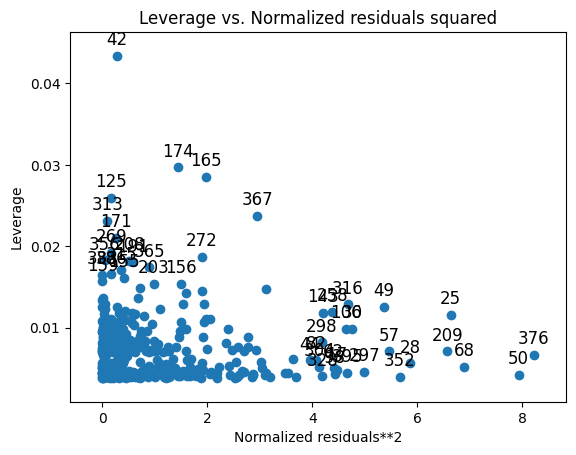

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# Leverage vs. Residuals Squared
plot_leverage_resid2(model_corrected)
plt.show()

#SUMMARY

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset again
carseats_df = pd.read_csv('/content/Carseats.csv')

# Prepare the data for regression analysis
# Convert Urban and US to numeric (binary) variables
carseats_df['Urban'] = carseats_df['Urban'].map({'Yes': 1, 'No': 0})
carseats_df['US'] = carseats_df['US'].map({'Yes': 1, 'No': 0})

# Define the predictor variables and target variable
X = carseats_df[['Price', 'Urban', 'US']]
y = carseats_df['Sales']

# Add a constant to the predictor variables
X_with_const = sm.add_constant(X)

# Fit the model
model_a = sm.OLS(y, X_with_const).fit()

# Display the model summary
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           2.39e-23
Time:                        18:01:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

12. This problem involves simple linear regression without an intercept.
(a) Recall that the coefficient estimate ˆ # for the linear regression of
Y onto X without an intercept is given by (3.38). Under what
circumstance is the coefficient estimate for the regression of X
onto Y the same as the coefficient estimate for the regression of
Y onto X?


#The coefficient estimate for the regression of X onto Y is the same as the regression of Y onto X under a special condition: when the sum of squares of X values is equal to the sum of squares of Y values. This usually means that X and Y have a perfect straight-line relationship with each other, where moving one unit up or down in X moves Y up or down by the exact same amount. This is a rare and specific situation because it requires both variables to change together perfectly and at the same rate.





(b) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y
onto X.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Part (b): Different coefficient estimates
np.random.seed(0)  # For reproducibility
n = 100
X_b = np.random.normal(0, 1, n)
Y_b = 2 * X_b + np.random.normal(0, 1, n)  # Ensuring some variation
beta_hat_b = np.sum(X_b * Y_b) / np.sum(X_b**2)
gamma_hat_b = np.sum(Y_b * X_b) / np.sum(Y_b**2)

(c) Generate an example in Python with n = 100 observations in
which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto
X.

In [21]:
# Part (c): Same coefficient estimates
# To ensure the sums of squares of X and Y are equal, let's directly manipulate one variable based on the other
X_c = np.random.normal(0, 1, n)
Y_c = X_c  # This ensures that the sum of squares will be the same
beta_hat_c = np.sum(X_c * Y_c) / np.sum(X_c**2)
gamma_hat_c = np.sum(Y_c * X_c) / np.sum(Y_c**2)

(beta_hat_b, gamma_hat_b, beta_hat_c, gamma_hat_c)

(2.1191076359458987, 0.38298134917052123, 1.0, 1.0)